In [4]:
!pip install schedule
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00


In [11]:
import bw_class
import database_bw
import hi_preprocessing_rfm
import hi_auto_arima
import hi_database

In [13]:
#train_0 = database_bw.making_dataframe_train_db('train_table')
#test_0 = database_bw.making_dataframe_test_db('test_table')

db_name = "TRAIN.DB"

hi_database.check_tables(db_name)
ecommerce_df = hi_database.db_to_df(db_name = db_name, table_name = "train_table")
ecommerce_df

,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간,쿠폰코드,할인율,GST,오프라인비용,온라인비용,마케팅비용
0,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,남,Chicago,12,ELEC10,10.0,0.10,4500,2424.50,6924.50
1,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,남,Chicago,12,ELEC10,10.0,0.10,4500,2424.50,6924.50
2,2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1,남,Chicago,12,OFF10,10.0,0.10,4500,2424.50,6924.50
3,3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1,남,Chicago,12,SALE10,10.0,0.18,4500,2424.50,6924.50
4,4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1,남,Chicago,12,AIO10,10.0,0.18,4500,2424.50,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,44456,USER_0035,Transaction_20090,2019-10-31,Product_0989,Nest-USA,2,149.00,6.00,Not Used,10,여,New York,26,ELEC10,10.0,0.10,2000,1251.87,3251.87
44457,44457,USER_0035,Transaction_20091,2019-10-31,Product_0981,Nest-USA,1,149.00,6.00,Used,10,여,New York,26,ELEC10,10.0,0.10,2000,1251.87,3251.87
44458,44458,USER_0035,Transaction_20092,2019-10-31,Product_0990,Nest,1,199.00,19.99,Used,10,여,New York,26,NE10,10.0,0.05,2000,1251.87,3251.87
44459,44459,USER_0035,Transaction_20093,2019-10-31,Product_0992,Nest,1,99.00,6.00,Clicked,10,여,New York,26,NE10,10.0,0.05,2000,1251.87,3251.87


In [ ]:
# ecommerce_df = bw_class.bw_preprocessing(train_0)

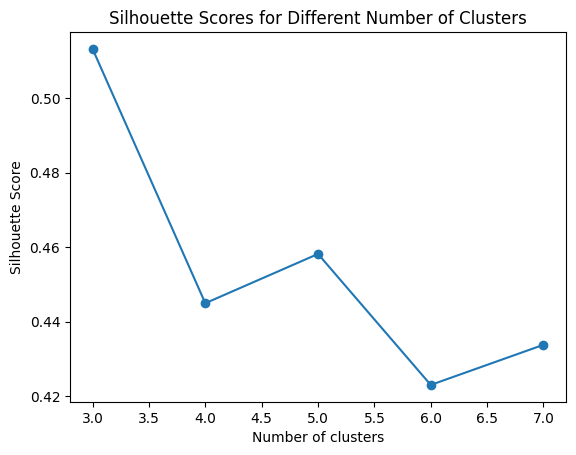

In [14]:
# rfm
rfm_data = hi_preprocessing_rfm.rfm_data(ecommerce_df)
rfm_pipeline = hi_preprocessing_rfm.RFMClusteringPipeline()
rfm_scaled = rfm_pipeline.fit_transform(rfm_data)
rfm_data['Cluster'] = rfm_pipeline.fit_kmeans(method='silhouette')

In [15]:
ecommerce_df = hi_preprocessing_rfm.add_cluster(ecommerce_df, rfm_data, on='고객ID')
ecommerce_df

,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간,쿠폰코드,할인율,GST,오프라인비용,온라인비용,마케팅비용,총구매금액,Cluster
0,0,1358,0000,2019-01-01,0981,Nest-USA,1,153.71,6.5,Used,1,1,Chicago,12,ELEC10,10.0,0.1,4500,2424.50,6924.50,153.71,2
1,0,1358,0000,2019-01-01,0981,Nest-USA,1,153.71,6.5,Used,1,1,Chicago,12,ELEC10,10.0,0.1,4500,2424.50,6924.50,153.71,2
2,0,1358,0000,2019-01-01,0981,Nest-USA,1,153.71,6.5,Used,1,1,Chicago,12,ELEC10,10.0,0.1,4500,2424.50,6924.50,153.71,2
3,0,1358,0000,2019-01-01,0981,Nest-USA,1,153.71,6.5,Used,1,1,Chicago,12,ELEC10,10.0,0.1,4500,2424.50,6924.50,153.71,2
4,0,1358,0000,2019-01-01,0981,Nest-USA,1,153.71,6.5,Used,1,1,Chicago,12,ELEC10,10.0,0.1,4500,2424.50,6924.50,153.71,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461336,44402,1155,20065,2019-10-31,0969,Office,1,4.79,6.0,Clicked,10,0,California,33,OFF10,10.0,0.1,2000,1251.87,3251.87,4.79,1
4461337,44402,1155,20065,2019-10-31,0969,Office,1,4.79,6.0,Clicked,10,0,California,33,OFF10,10.0,0.1,2000,1251.87,3251.87,4.79,1
4461338,44402,1155,20065,2019-10-31,0969,Office,1,4.79,6.0,Clicked,10,0,California,33,OFF10,10.0,0.1,2000,1251.87,3251.87,4.79,1
4461339,44402,1155,20065,2019-10-31,0969,Office,1,4.79,6.0,Clicked,10,0,California,33,OFF10,10.0,0.1,2000,1251.87,3251.87,4.79,1


In [18]:
auto_arima_pipeline = hi_auto_arima.AutoArimaPipeline()
# data split
out = auto_arima_pipeline.split_data_by_cluster(ecommerce_df)
train, test = auto_arima_pipeline.create_train_test_by_cluster(ecommerce_df, out)

In [19]:
# 모델 피팅
auto_arima_pipeline.fit(train)

# 예측 수행
predictions = auto_arima_pipeline.predict(test)

# 결과 출력
for i, prediction in enumerate(predictions):
    print(f"Predictions for Cluster {i}:")
    print(prediction)

Predictions for Cluster 0:
              마케팅비용  Cluster         pred
거래날짜                                     
2019-05-24  1670.51        0  2147.023539
2019-05-25  3565.75        0  3273.610535
2019-05-26  3752.13        0  3343.860710
2019-05-28   965.40        0  2031.686311
2019-05-29  1170.64        0  2412.728447
2019-05-30  1762.38        0  2217.993494
2019-05-31  1510.30        0  1797.565447
2019-06-01   820.25        0  1535.392402
2019-06-02  2122.46        0  2310.468011
2019-06-03  1730.43        0  1905.153404
2019-06-04  6053.18        0  4547.415529
2019-06-05  6702.10        0  5207.588863
2019-06-06  4626.87        0  4612.456218
2019-06-07  5194.16        0  5501.554745
2019-06-08  5098.46        0  5066.629913
2019-06-09  6440.10        0  5859.120208
2019-06-10  5381.94        0  5225.471508
2019-06-11  4428.32        0  4874.597563
2019-06-12  5321.52        0  5365.702099
2019-06-13  4084.43        0  4317.952636
2019-06-14  4749.49        0  4821.118607
2019-06